- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

# 히스토그램 (Histogram)

## Histogram

- 이미지의 밝기의 분포를 그래프로 표현한 방식

- 이미지의 전체의 밝기 분포와 채도(밝고 어두움)을 알 수 있음

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image013.jpg">

<sub>[이미지 출처] https://www.cambridgeincolour.com/tutorials/histograms1.htm</sub>

<br>

## 용어 설명

- BINS
  
  - 히스토그램 그래프의 X축의 간격  
    위 그림의 경우에는 0 ~ 255를 표현하였기 때문에 BINS값은 256이 된다.  
    BINS값이 16이면 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개로 표현  
    OpenCV에서는 BINS를 histSize 라고 표현

- DIMS

  - 이미지에서 조사하고자하는 값을 의미  
    빛의 강도를 조사할 것인지, RGB값을 조사할 것인지를 결정

- RANGE

  - 측정하고자하는 값의 범위  

<br>

- `cv2.calcHist()`

  - Parameters
    - `image` : 분석대상 이미지(uint8 or float32 type). Array형태.

    - `channels` : 분석 채널(X축의 대상)
    
      - 이미지가 graysacle이면 [0], color 이미지이면 [0],[0,1] 형태(1 : Blue, 2: Green, 3: Red)

    - `mask` : 이미지의 분석영역. None이면 전체 영역.

    - `histSize` : BINS 값. [256]

    - `ranges` : Range값. [0,256]


* flower1.jpg

![](https://cdn.pixabay.com/photo/2015/10/09/00/55/lotus-978659_960_720.jpg)

<sub>[이미지 출처] https://pixabay.com/ko/photos/%EB%A1%9C%ED%84%B0%EC%8A%A4-%EA%BD%83-%EC%97%AC%EB%A6%84-%EC%A0%A0-%EC%9E%90%EC%97%B0-978659/</sub>

* flower2.jpg

![](https://cdn.pixabay.com/photo/2012/03/01/00/55/garden-19830_960_720.jpg)

<sub>[이미지 출처] https://pixabay.com/ko/photos/%EC%A0%95%EC%9B%90-%EA%BD%83-%EB%82%98%EB%B9%84-19830/</sub>

In [9]:
img_1 = cv2.imread('./img/flower_1.jpg', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('./img/flower_2.jpg', cv2.IMREAD_GRAYSCALE)

In [10]:
hist_1 = cv2.calcHist([img_1], [0], None, [256], [0, 256])
hist_2 = cv2.calcHist([img_2], [0], None, [256], [0, 256])

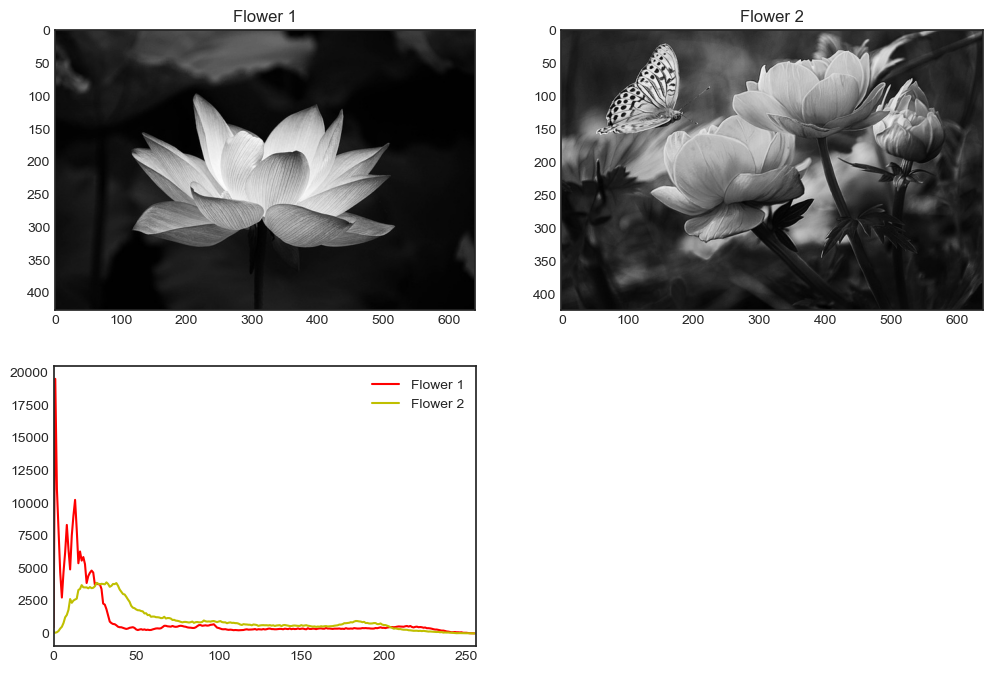

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_1, 'gray')
plt.title('Flower 1')

plt.subplot(2, 2, 2)
plt.imshow(img_2, 'gray')
plt.title('Flower 2')

plt.subplot(2, 2, 3)
plt.plot(hist_1, color='r', label='Flower 1')
plt.plot(hist_2, color='y', label='Flower 2')
plt.xlim([0, 256])
plt.legend()

plt.show()

## Mask를 적용한 히스토그램

![](https://cdn.pixabay.com/photo/2020/03/12/04/07/cat-4923824_960_720.jpg)

  <sub>[이미지 출처] https://pixabay.com/photos/cat-pet-feline-animal-4923824/</sub>

In [13]:
img = cv2.imread('./img/cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape

(427, 640, 3)

In [14]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[180:400, 260:600] = 255

In [15]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [16]:
hist_full = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [1], mask, [256], [0, 256])

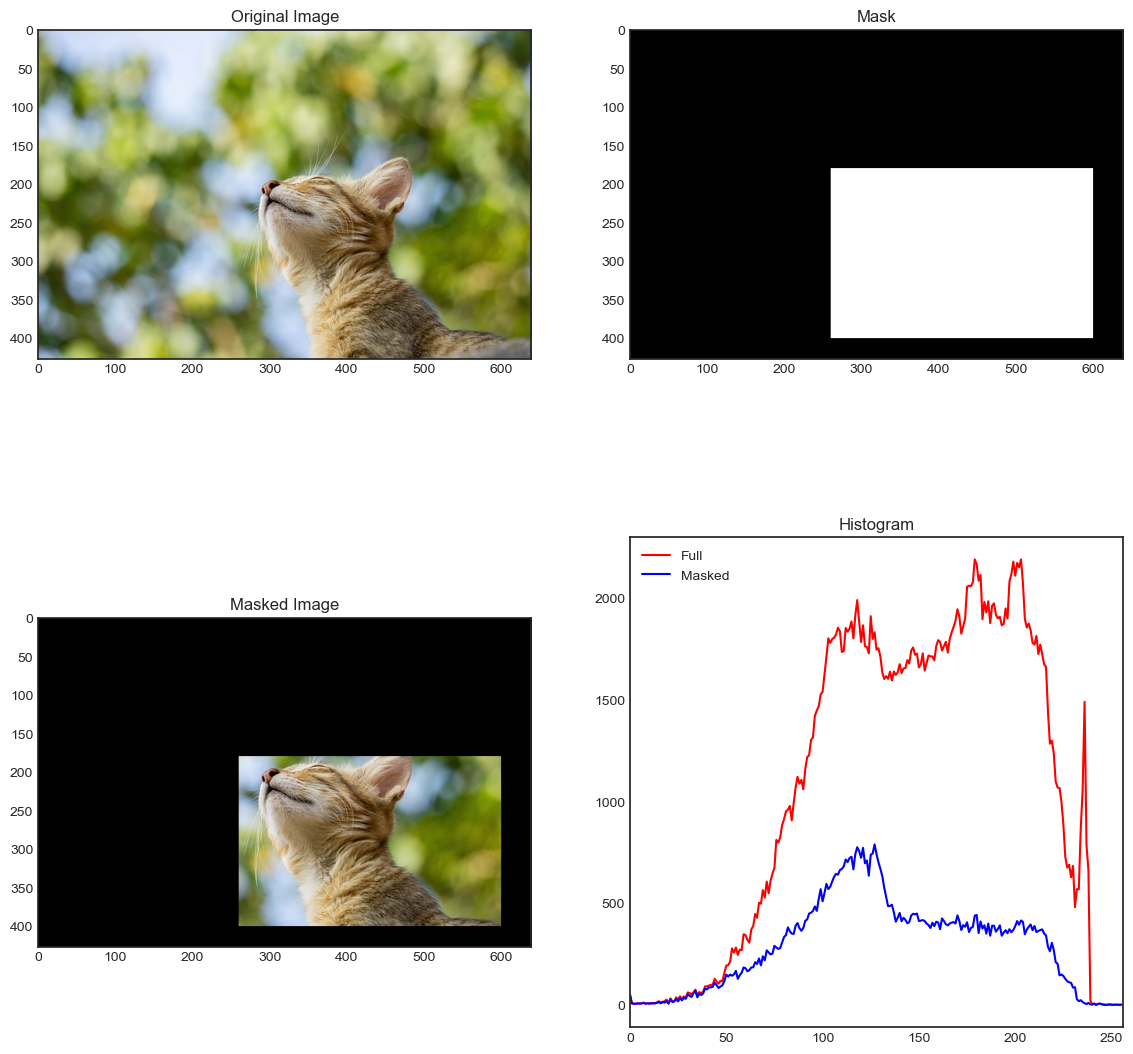

In [18]:
plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Mask')

plt.subplot(2, 2, 3)
plt.imshow(masked_img, 'gray')
plt.title('Masked Image')

plt.subplot(2, 2, 4)
plt.plot(hist_full, color='r', label='Full')
plt.plot(hist_mask, color='b', label='Masked')
plt.title('Histogram')
plt.xlim([0, 256])
plt.legend()

plt.show()

## 히스토그램 평탄화

- 이미지의 히스토그램이 특정영역에 너무 집중되어 있으면 contrast가 낮아 좋은 이미지라고 할 수 없음

- 전체 영역에 골고루 분포가 되어 있을 때 좋은 이미지라고 할 수 있는데, 아래 히스토그램을 보면 좌측 처럼 특정 영역에 집중되어 있는 분포를 오른쪽 처럼 골고루 분포하도록 하는 작업을 Histogram Equalization 이라고 함

- (참고) 이론적인 방법

  - 이미지의 각 픽셀의 cumulative distribution function(cdf)값을 구하고 Histogram Equalization 공식에 대입하여 0 ~ 255 사이의 값으로 변환

  - 이렇게 새롭게 구해진 값으로 이미지를 표현하면 균일화된 이미지를 얻을 수 있음

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Histogrammeinebnung.png/600px-Histogrammeinebnung.png">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/Histogram_equalization</sub>

- Numpy를 활용하여 균일화 작업

* taiwan.jpg

  <img src="https://cdn.pixabay.com/photo/2020/08/03/13/33/taiwan-5460063_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EB%8C%80%EB%A7%8C-%EB%8F%84%EC%8B%9C-%EB%8F%84%EC%8B%9C-%ED%92%8D%EA%B2%BD-%EC%97%AC%ED%96%89-5460063/</sub>

In [19]:
img = cv2.imread('./img/taiwan.jpg', 0)

img.shape

(427, 640)

In [20]:
hist, bins = np.histogram(img.flatten(), 256, (0, 256))

In [21]:
cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf, 0)

In [22]:
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

cdf = np.ma.filled(cdf_m, 0).astype(np.uint8)

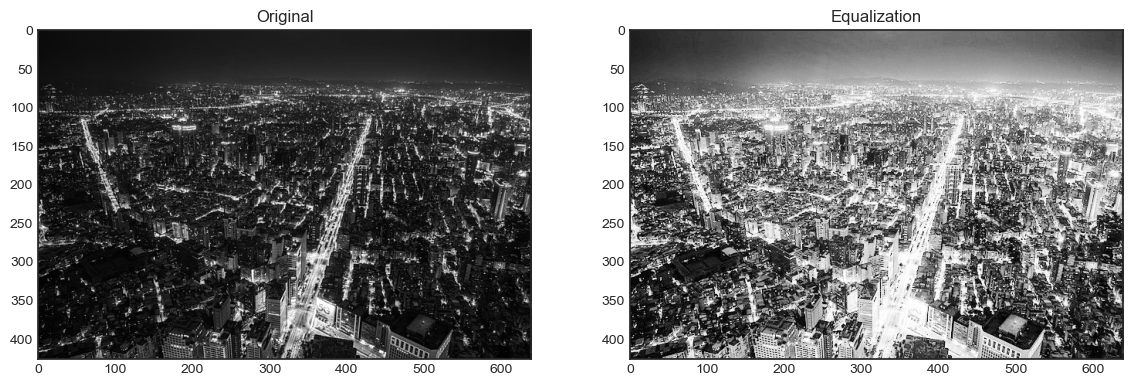

In [23]:
img_2 = cdf[img]

plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_2, 'gray')
plt.title("Equalization")

plt.show()

- OpenCV 함수로 간단하게 처리

In [24]:
img = cv2.imread('./img/taiwan.jpg', 0)

img.shape

(427, 640)

In [25]:
img_2 = cv2.equalizeHist(img)

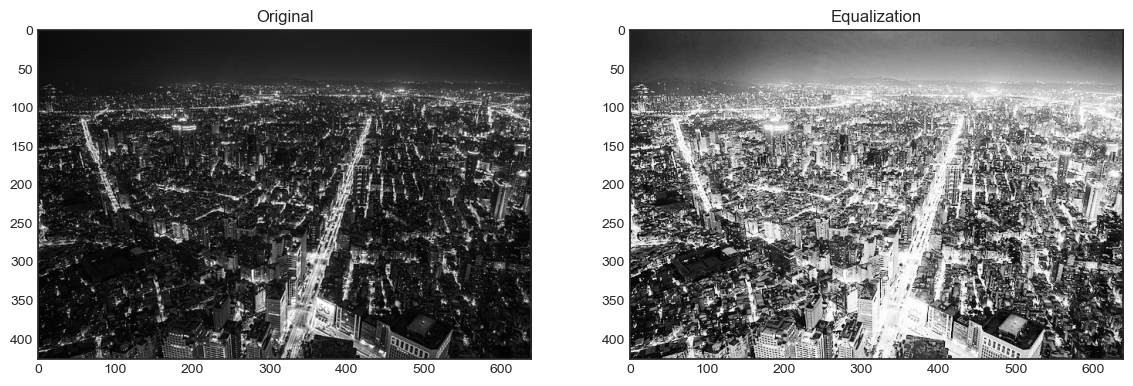

In [26]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_2, 'gray')
plt.title("Equalization")

plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

- 지금까지의 처리는 이미지의 전체적인 부분에 균일화를 적용

- 하지만 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여 있기 때문에 전체에 적용하는 것은 그렇게 유용하지 않음

- 이미지
  - 'keyboard.png'

  ![](https://cdn.pixabay.com/photo/2015/08/13/01/00/keyboard-886462_960_720.jpg)
  
  <sub>[이미지 출처] https://pixabay.com/ko/photos/%ED%82%A4%EB%B3%B4%EB%93%9C-%EC%BB%B4%ED%93%A8%ED%84%B0-%ED%82%A4-%ED%99%94%EC%9D%B4%ED%8A%B8-886462/</sub>

In [29]:
img = cv2.imread('./img/keyboard.jpg', 0)

img.shape

(360, 640)

In [30]:
img_2 = cv2.equalizeHist(img)

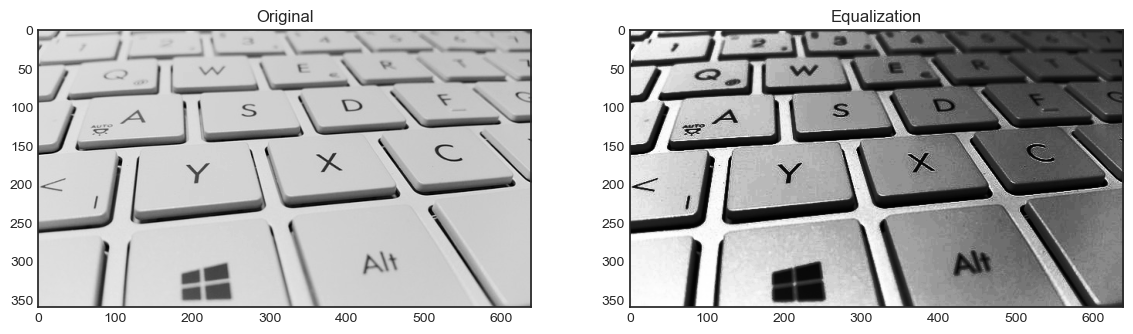

In [31]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_2, 'gray')
plt.title("Equalization")

plt.show()

- 위 결과에서 주변의 어두운 부분은 균일화가 적용되어 밝아졌지만, 가운데 이미지는 너무 밝아져 경계선을 알아볼 수 없게 되어버림

- 이 문제를 해결하기 위해서 `adaptive histogram equalization`을 적용하게 됨
  - 즉, 이미지를 작은 title형태로 나누어 그 title안에서 Equalization을 적용하는 방식
  
  - 작은 영역이다 보니 작은 노이즈(극단적으로 어둡거나, 밝은 영역)가 있으면 이것이 반영이 되어 원하는 결과를 얻을 수 없게 됨
  
  - 이 문제를 피하기 위해서 `contrast limit`라는 값을 적용하여 이 값을 넘어가는 경우는 그 영역은 다른 영역에 균일하게 배분하여 적용

In [32]:
img = cv2.imread('./img/keyboard.jpg', 0)

img.shape

(360, 640)

In [33]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_2 = clahe.apply(img)

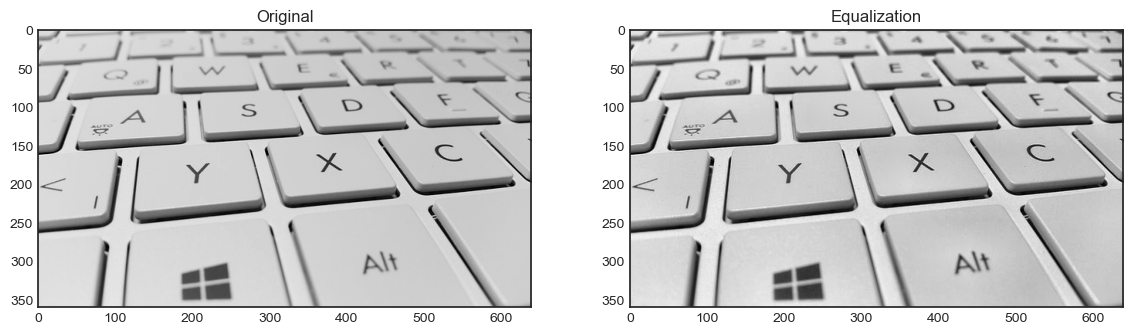

In [34]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_2, 'gray')
plt.title("Equalization")

plt.show()

## 2D Histogram

- 지금까지 Histogram은 1차원으로 grayscale 이미지의 pixel의 강도, 즉 빛의 세기를 분석한 결과

- 2D Histogrm 은 Color 이미지의 Hue(색상) & Saturation(채도)을 동시에 분석하는 방법

- 색상과 채도를 분석하기 때문에 HSV Format으로 변환해야 함

- `cv2.calcHist()`

  - Parameters
    - `image` : HSV로 변환된 이미지

    - `channel` : 0-> Hue, 1-> Saturation

    - `bins` : [180,256] 첫번째는 Hue, 두번째는 Saturation

    - `range` : [0,180,0,256] : Hue(0~180), Saturation(0,256)



- 이미지

  - canal.jpg

  <img src="https://cdn.pixabay.com/photo/2020/08/14/15/22/canal-5488271_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/photos/canal-boats-buildings-reflection-5488271/</sub>

In [35]:
img = cv2.imread('./img/canal.jpg')

img.shape

(427, 640, 3)

In [36]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [37]:
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

In [40]:
cv2.imshow('', hist)
cv2.waitKey(0)
cv2.destroyAllWindows()

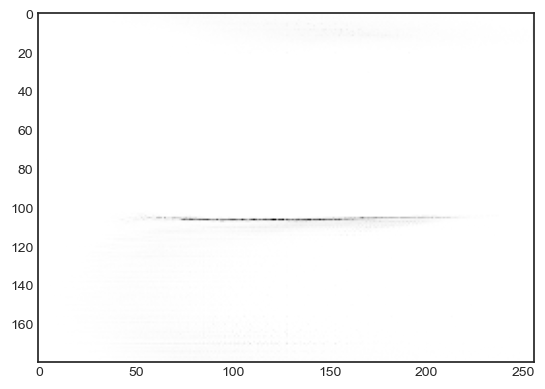

In [41]:
plt.imshow(hist)
plt.show()

- 위 Histogram을 보면 X축은 Saturation, Y축은 Hue값을 나타냄

- Y축을 보면 100근처에 값이 모여 있는 것을 알 수 있음
- HSV모델에서 H가 100이면 하늘색
- 이 이미지는 하늘색이 많이 분포되어 있다는 것을 2D Histogram을 통해서 알 수 있음
